# Assignment #7
### MACS 30000, Dr. Evans
### Due Monday, Nov. 26 at 11:30am
### Haowen Shang

### 1. Unit Testing in Python

#### Problem1

In [1]:
# The original function is:

def smallest_factor(n):
    """Return the smallest prime factor of the positive integer n."""
    if n == 1: return 1
    for i in range(2, int(n**.5)):
        if n % i == 0: return i
    return n

In [ ]:
# The test code is:

import Problem1 as p1

def test_smallest_factor():
    assert p1.smallest_factor(1) == 1, "failed on 1"
    assert p1.smallest_factor(2) == 2, "failed on smallest prime number case"
    assert p1.smallest_factor(3) == 3, "failed on small prime number cases"
    assert p1.smallest_factor(4) == 2, "failed on smallest composite number case"
    assert p1.smallest_factor(6) == 2, "failed on small composite number cases"
    assert p1.smallest_factor(9) == 3, "failed when n is the square of prime number cases"
    assert p1.smallest_factor(16) == 2, "failed when n is the square of composite number cases"
    assert p1.smallest_factor(17) == 17, "failed on large prime number cases"
    assert p1.smallest_factor(18) == 2, "failed on large composite number cases"

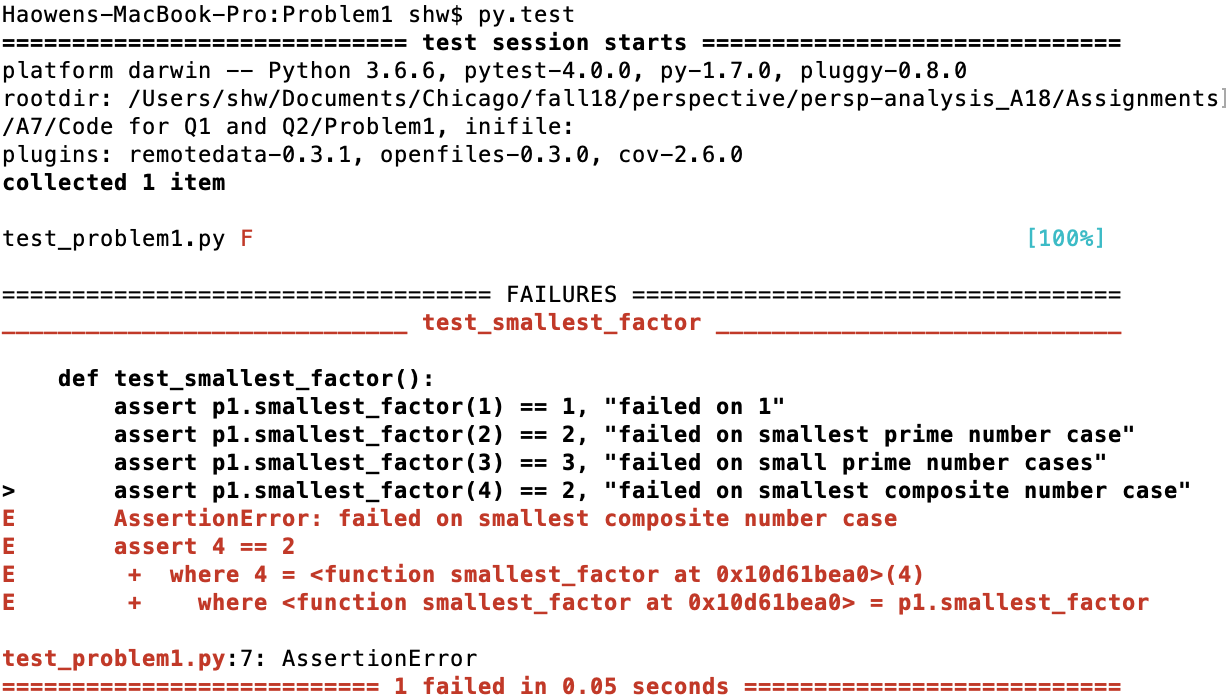

In [2]:
# The test result is:
from IPython.display import Image
Image (filename="Problem1-1.png")

From the test result, we know that the original function failed on smallest composite number case, because the smallest factor of 4 is 2 rather than 4, but 2 isn't in range (2, int(n ** .5)).  Also, because range (2, int(n ** .5)) doesn't include int(n ** .5), the test will fail when n is the square of some small prime numbers, such as n=4, n=9, n=25. We can change the range from (2, int(n * * .5)) to (2, int(n * * .5)+1) to avoid this problem.

In [1]:
# The corrected function is:

def smallest_factor(n):
    """Return the smallest prime factor of the positive integer n."""
    if n == 1: return 1
    for i in range(2, int(n**.5) + 1):
        if n % i == 0: return i
    return n


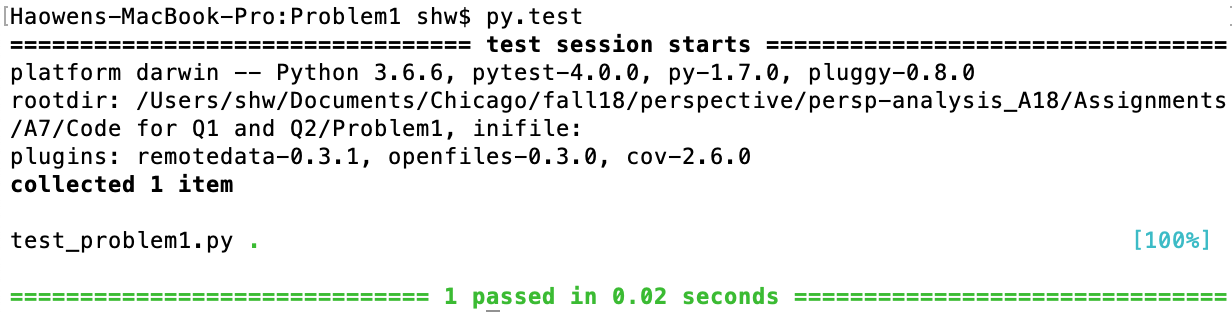

In [3]:
# The test result is:
from IPython.display import Image
Image (filename="Problem1-2.png")

#### Problem 2

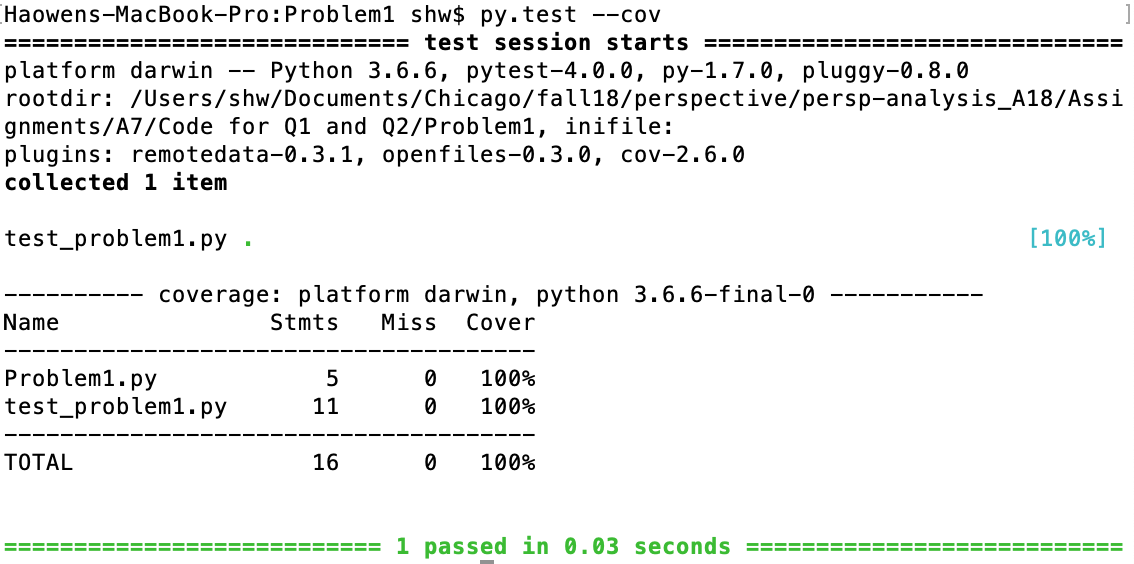

In [4]:
# The tests coverage of smallest_factor() is 100%

from IPython.display import Image
Image (filename="Problem1-cov.png")


In [3]:
# The original fuction of month length is:

def month_length(month, leap_year=False):
    """Return the number of days in the given month."""
    if month in {"September", "April", "June", "November"}:
        return 30
    elif month in {"January", "March", "May", "July",
                        "August", "October", "December"}:
        return 31
    if month == "February":
        if not leap_year:
            return 28
        else:
            return 29
    else:
        return None

In [ ]:
# The test code is:

import Problem2 as p2

def test_month_length():
    assert p2.month_length("January") == 31, "failed on January"
    assert p2.month_length("February") == 28, "failed on February"
    assert p2.month_length("February",leap_year=True) == 29, "failed on February(leap year)"
    assert p2.month_length("March") == 31, "failed on March"
    assert p2.month_length("April") == 30, "failed on April"
    assert p2.month_length("May") == 31, "failed on May"
    assert p2.month_length("June") == 30, "failed on June"
    assert p2.month_length("July") == 31, "failed on July"
    assert p2.month_length("August") == 31, "failed on August"
    assert p2.month_length("September") == 30, "failed on September"
    assert p2.month_length("October") == 31, "failed on Octuber"
    assert p2.month_length("November") == 30, "failed on November"
    assert p2.month_length("December") == 31, "failed on December"
    assert p2.month_length("abc") == None, "failed on invalid input"
    

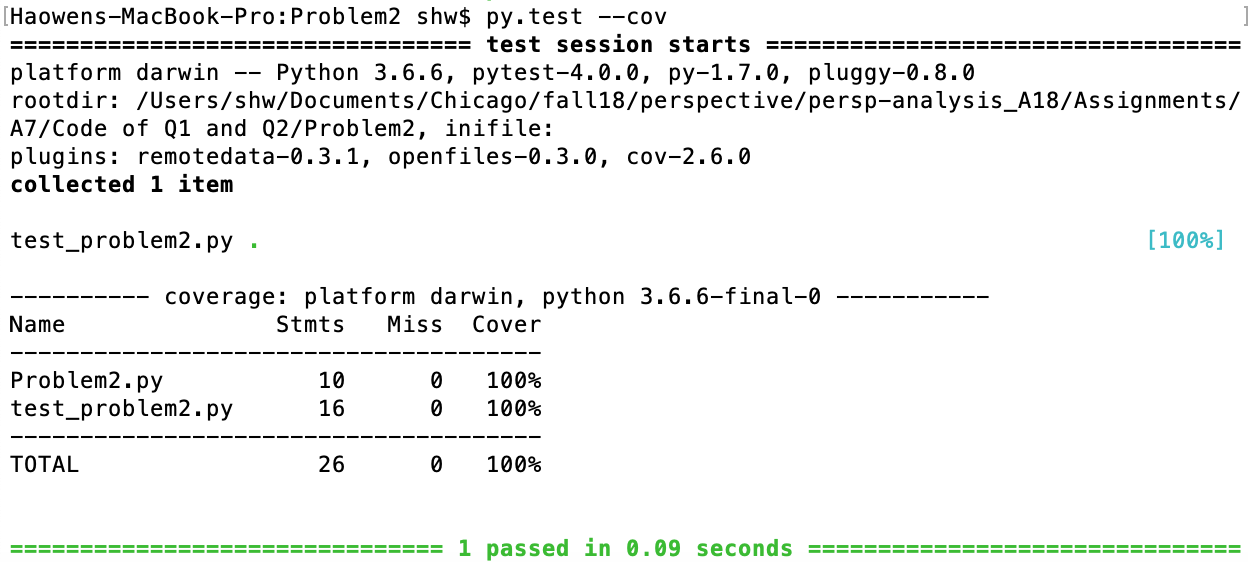

In [5]:
# The test result is:
from IPython.display import Image
Image (filename="Problem2.png")

#### Problem 3

In [ ]:
# The original function is:
def operate(a, b, oper):
    """Apply an arithmetic operation to a and b."""
    if type(oper) is not str:
        raise TypeError("oper must be a string")
    elif oper == '+':
        return a + b
    elif oper == '-':
        return a - b
    elif oper == '*':
        return a * b
    elif oper == '/':
        if b == 0:
            raise ZeroDivisionError("division by zero is undefined")
        return a / b
    raise ValueError("oper must be one of '+', '/', '-', or '*'")

In [ ]:
# The test code is:

import pytest
import Problem3 as p3

def test_operate():
    assert p3.operate(5, 6, "+") == 11, "addition error"
    assert p3.operate(5, 6, "-") == -1, "subtraction error"
    assert p3.operate(5, 6, "*") == 30, "subtraction error"
    assert p3.operate(6, 5, "/") == 1.2, "division error"
    with pytest.raises(TypeError) as excinfo1:
        p3.operate(5, 6, 7)
    assert excinfo1.value.args[0] == "oper must be a string"
    with pytest.raises(ZeroDivisionError) as excinfo2:
        p3.operate(5, 0, "/")
    assert excinfo2.value.args[0] == "division by zero is undefined"
    with pytest.raises(ValueError) as excinfo3:
        p3.operate(5, 6, "a")
    assert excinfo3.value.args[0] == "oper must be one of '+', '/', '-', or '*'"
    

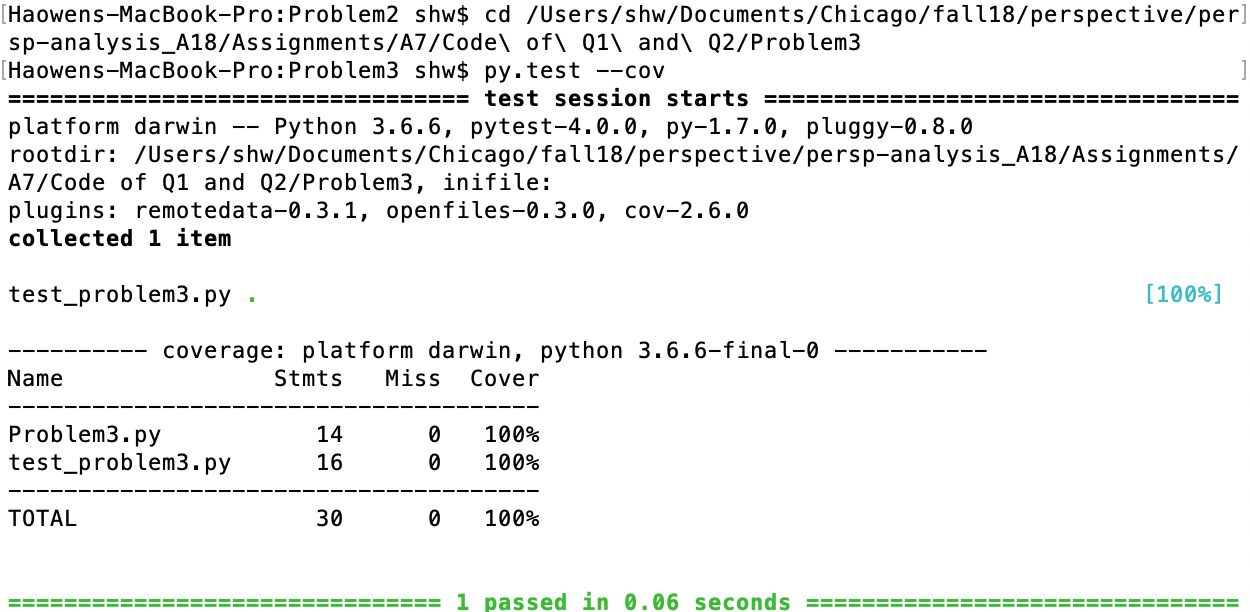

In [9]:
# The test result is:

from IPython.display import Image
Image (filename="Problem3.png")


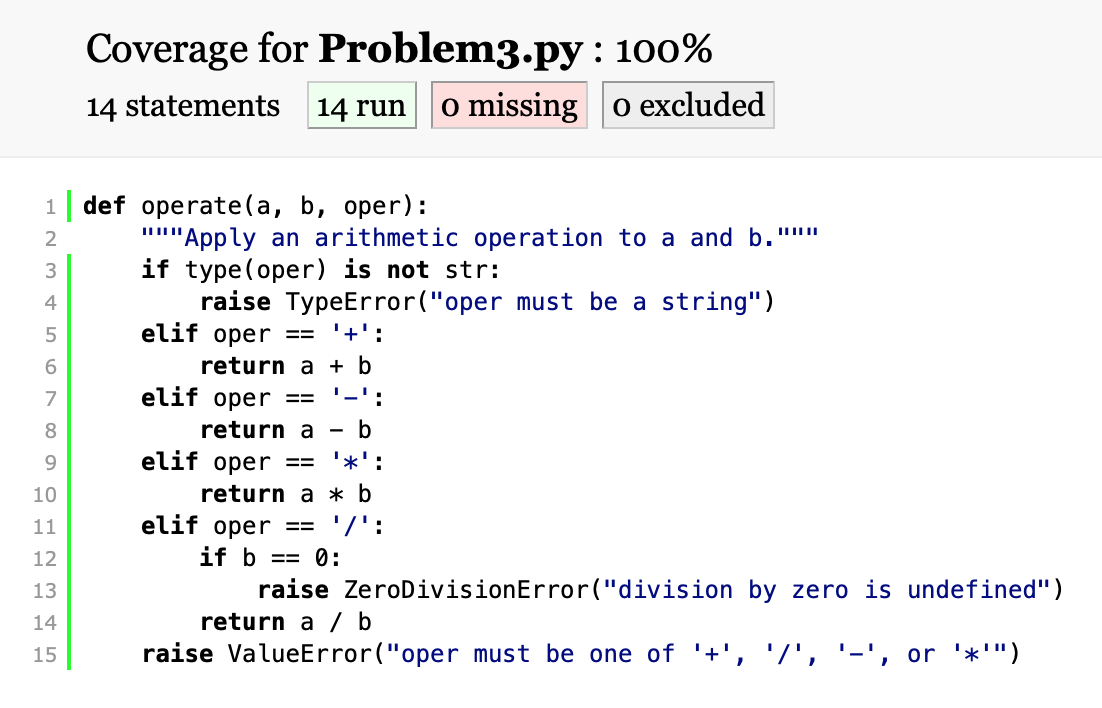

In [7]:
# The test has full coverage for the function.
# The cov_report is:
from IPython.display import Image
Image (filename="Problem3-cov-report.png")



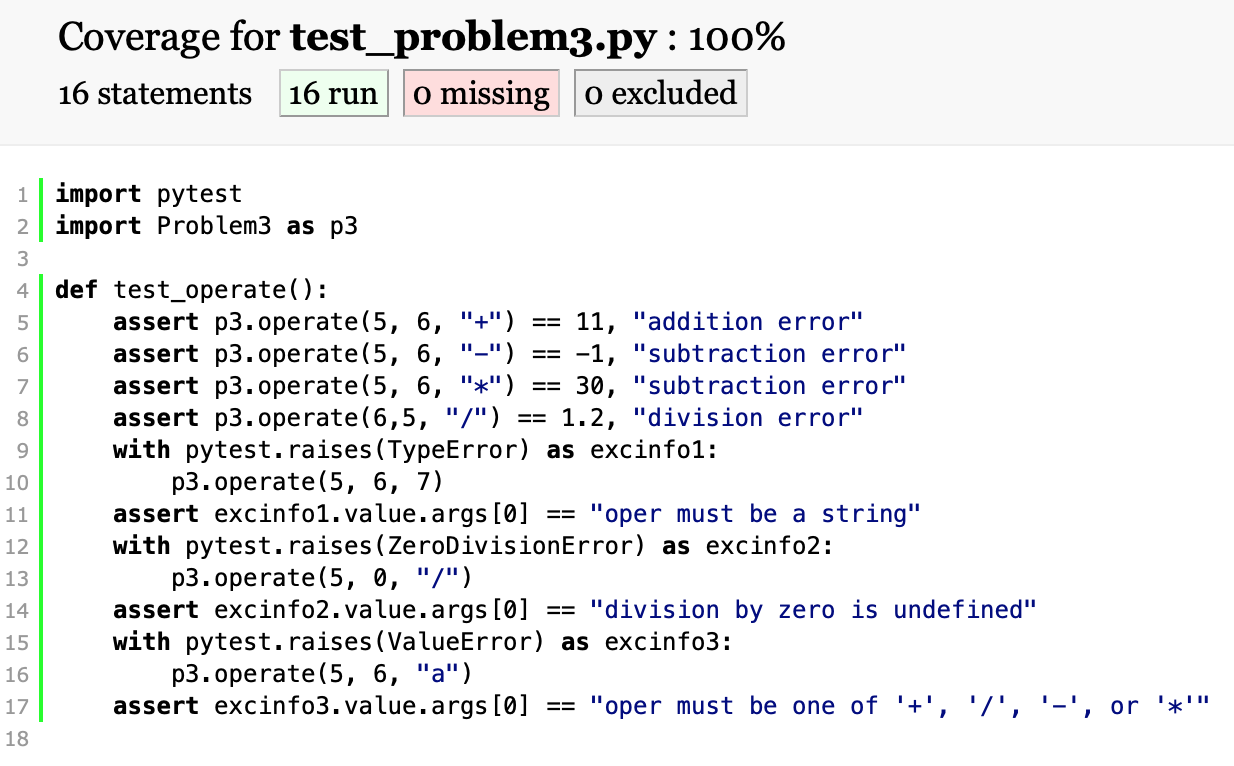

In [8]:
from IPython.display import Image
Image (filename="Problem3-test-cov-report.png")

### 2. Test driven development

In [3]:
# The get_r function is:

import numpy as np
    
def get_r(K, L, alpha, Z, delta):
    '''
    This function generates the interest rate or vector of interest rates
    '''
    if 0 < alpha < 1 and 0 <= delta < 1 and Z > 0:
        
        if np.isscalar(K) and np.isscalar(L):
            if K > 0 and L > 0:
                r = alpha * Z * (L / K) ** (1 - alpha) - delta
                return r
            
        elif not np.isscalar(K) and not np.isscalar(L) and K.shape == L.shape:
            if all(K > 0) and all(L > 0):
                r = alpha * Z * (L / K) ** (1 - alpha) - delta
                return r
    return None  
    


Some test cases include delata = 0, so if the restriction is 0 < delta < 1, I can't pass all the test cases. Then if I change the restriction to 0 <= delta < 1, I can pass all the test cases.

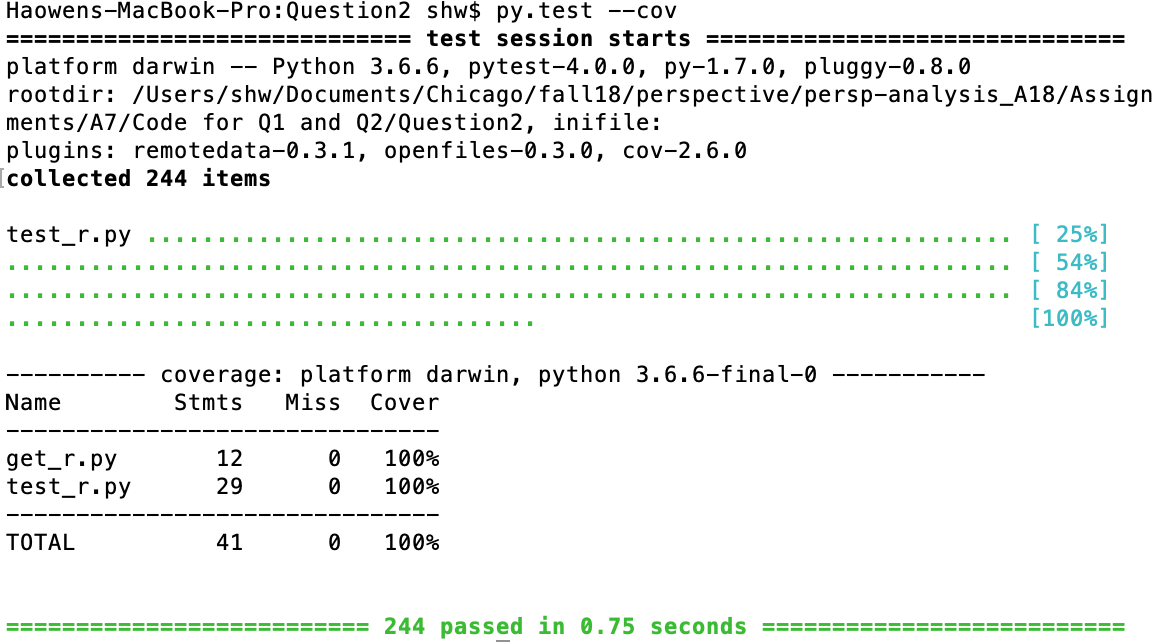

In [10]:
# The test result is:

from IPython.display import Image
Image (filename="Question2.png")
